In [545]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### **Binary Logistic Regression**

In [546]:
data_frame = pd.read_csv("../datasets/logistic_regression_dataset.csv")
data_frame.head()

,Age,Income,Credit Score,Loan Amount,Employment Status,Loan Default
0,58,104135,625,35746,1,0
1,48,50222,629,37352,1,0
2,34,92373,552,44790,1,1
3,27,94575,671,46919,1,0
4,40,111354,717,10600,0,1


In [547]:
x_2D = data_frame.drop(columns=["Loan Default"])
y = data_frame["Loan Default"]
x_2D.tail()

,Age,Income,Credit Score,Loan Amount,Employment Status
95,28,118041,537,44734,1
96,27,15854,729,12079,1
97,31,105084,550,12987,1
98,53,53623,763,44567,1
99,52,22392,782,33940,0


In [548]:
# Split data into features (X) and target (y)
x_train, x_test, y_train, y_test = train_test_split(x_2D, y, test_size=0.2)
x_train.head()

,Age,Income,Credit Score,Loan Amount,Employment Status
3,27,94575,671,46919,1
26,46,102939,758,15492,0
43,39,17693,751,21538,1
29,34,86910,845,24778,1
91,24,100616,675,5876,0


- **Model Training**

   **model.fit(x, y)** : To train the model for best fit line. ***x values*** must be **2D array**.

In [549]:
# Initialize and train the logistic regression model

model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

- **Value Prediction Using Trained Model**

In [550]:
# Make predictions on the test set

y_pred = model.predict(x_test)

In [551]:
x_test.head()

,Age,Income,Credit Score,Loan Amount,Employment Status
73,45,81199,598,18121,0
62,33,107787,553,9780,1
27,47,33141,647,40743,1
18,49,105982,739,37635,0
47,54,40939,559,32751,1


In [552]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

**model.score(x_test, y_test)** : Return the **accuracy** of the model based on x, y test values

In [553]:
model.score(x_test, y_test) # x values must be in 2D array

0.85

#### Model Evaluation

In [554]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [555]:
clf_report = classification_report(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

# Evaluate the model
print("\nClassification Report:\n", clf_report)
print("Accuracy Score:", acc_score)


Classification Report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.83      0.91        18

    accuracy                           0.85        20
   macro avg       0.70      0.92      0.74        20
weighted avg       0.94      0.85      0.88        20

Accuracy Score: 0.85


- **ROC Curve**: Plots TPR against FPR at various thresholds.
- **AUC (Area Under Curve)**: Summarizes the ROC curve into a single value.

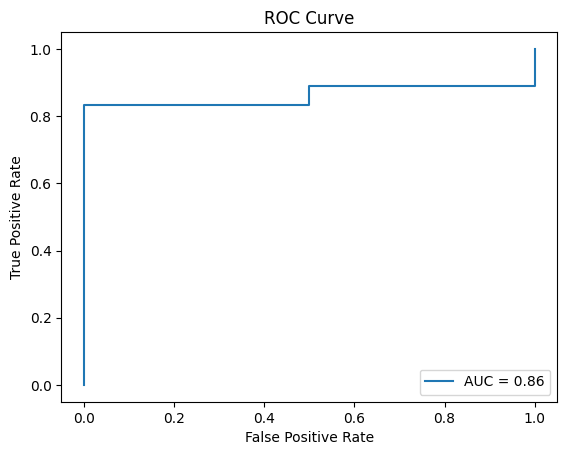

In [556]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

- **Confusion Matrix**: Shows TP, FP, TN, FN counts.

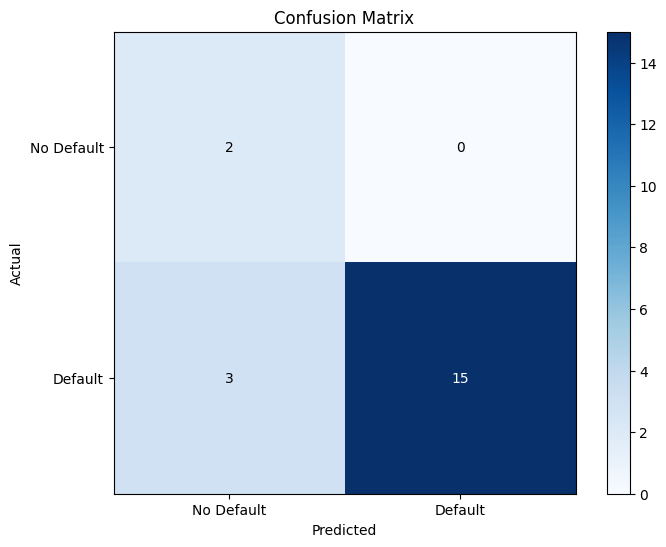

In [557]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation="nearest", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

# Add text annotation for each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.xticks([0, 1], ["No Default", "Default"])
plt.yticks([0, 1], ["No Default", "Default"])

plt.show()

##
---

### **Multiclass Logistic Regression**

- #### Example 01: 

In [558]:
data_frame2 = pd.read_csv("../datasets/multiclass_vehicle_dataset.csv")
data_frame2.head()

,Age,Annual Income,Credit Score,Family Size,Driving Frequency,Preferred Vehicle Type
0,56,22695,730,3,3,0
1,46,144375,689,2,4,0
2,32,68190,724,1,5,0
3,60,25258,782,3,4,0
4,25,107538,620,1,5,0


In [559]:
x_2D_multy = data_frame2.drop(columns=["Preferred Vehicle Type"])
y_multy = data_frame2["Preferred Vehicle Type"]

In [560]:
x_train, x_test, y_train, y_test = train_test_split(x_2D_multy, y_multy, test_size=0.2)

In [561]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [562]:
y_pred = model.predict(x_test)
y_pred

array([1, 3, 4, 3, 2, 3, 2, 2, 3, 2, 3, 4, 2, 2, 0, 2, 2, 2, 4, 0, 2, 4,
       3, 0, 1, 1, 2, 2, 3, 2, 3, 3, 2, 2, 3, 1, 2, 2, 2, 2, 0, 2, 3, 3,
       2, 2, 0, 3, 2, 2, 1, 4, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 1, 2,
       4, 2, 2, 2, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 2, 3, 3, 4, 2, 2, 2,
       0, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3])

In [563]:
model.score(x_test, y_test)

0.25

- #### Example 02:

In [564]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiclass Logistic Regression model
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [565]:
model.score(X_test, y_test)

1.0

##
---